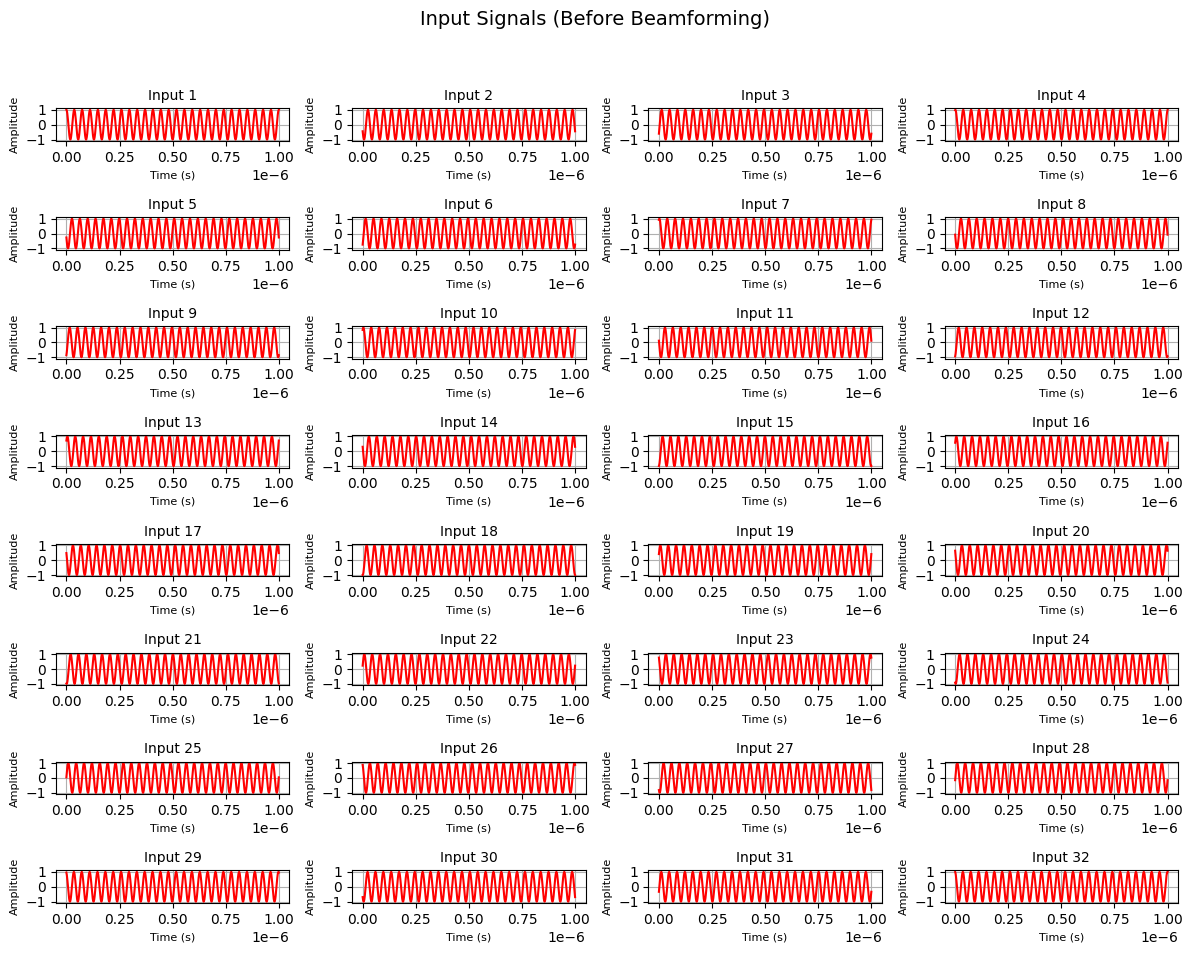

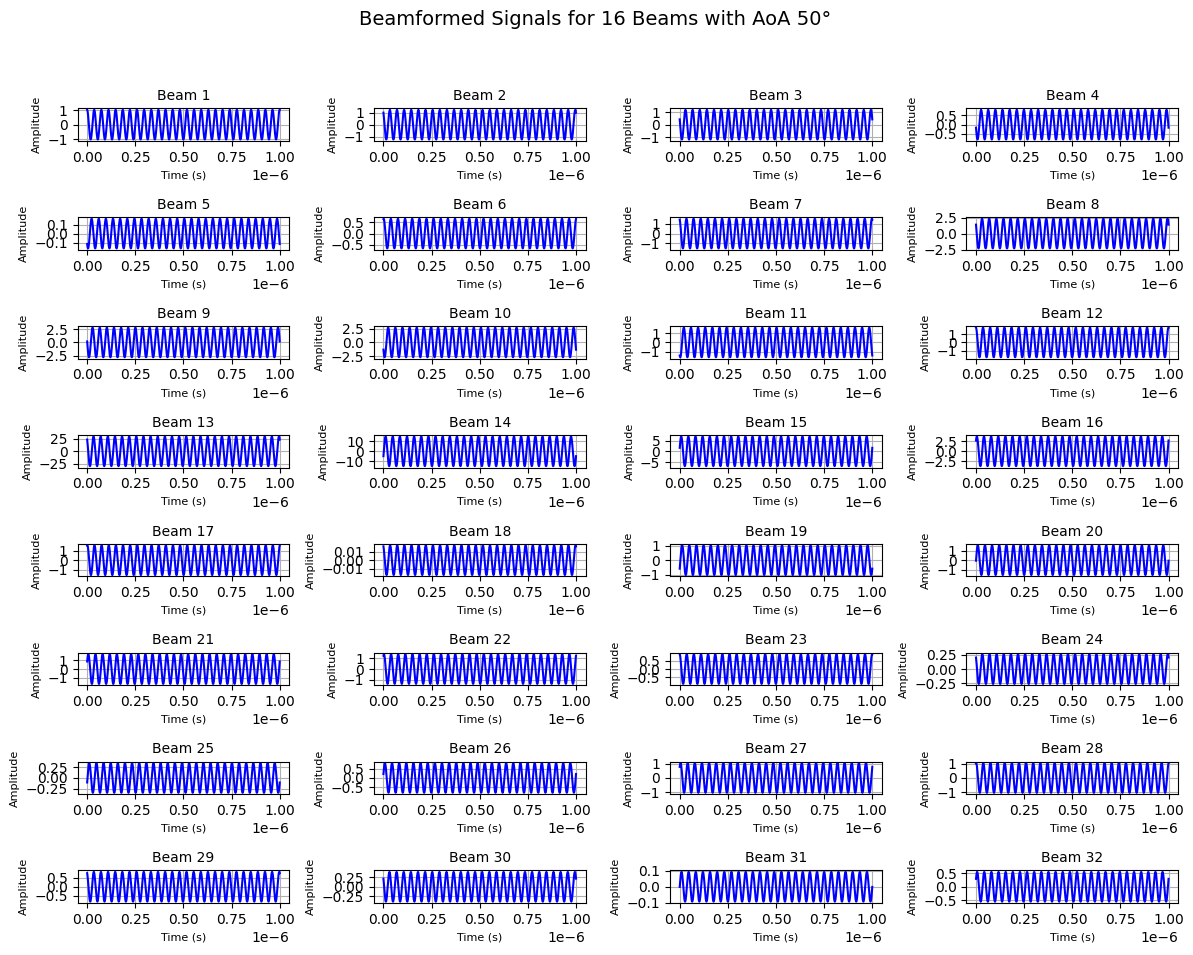

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 32  # Number of elements
fc = 27e9  # Carrier frequency (27 GHz)
f = 32e9
c = 3e8  # Speed of light
lamb = c / fc  # Wavelength at carrier frequency

l_min = c/f   # Wavelength at max frequency

dx = l_min / 2  # Inter-element spacing

# Compute 16x16 DVM matrix
tau_unit = 2 * dx / (c * N)  # Unit time delay
dvm_matrix = np.exp(-1j * 2 * np.pi * fc * np.outer(np.arange(N), tau_unit * np.arange(N)))  

# Time vector
t = np.linspace(0, 1e-6, 1000)  # 1 µs duration, 1000 samples

# Angle of arrival (AoA) - User-defined
theta_deg = 50  # Change this to test different angles
theta = np.deg2rad(theta_deg)  # Convert to radians

# phase shift calculation for input waveforms
phase_shifts = 2 * np.pi * np.arange(N) * dx / lamb * np.sin(theta)  

# Use complex exponential signals (instead of real cosines)
input_signals = np.array([np.exp(1j * (2 * np.pi * fc * t + phase_shifts[i])) for i in range(N)])


# Multiply input signals with DVM matrix to generate transmitted signals
transmitted_signals = np.dot(dvm_matrix, input_signals)

# ====== PLOT INPUT SIGNALS ======
fig1, axes1 = plt.subplots(8, 4, figsize=(12, 10))
fig1.suptitle("Input Signals (Before Beamforming)", fontsize=14)

for i in range(N):
    row, col = divmod(i, 4)  # Compute subplot position
    axes1[row, col].plot(t, np.real(input_signals[i]), color='r')  # Real part of input
    axes1[row, col].set_title(f"Input {i+1}", fontsize=10)
    axes1[row, col].set_xlabel("Time (s)", fontsize=8)
    axes1[row, col].set_ylabel("Amplitude", fontsize=8)
    axes1[row, col].grid()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout
plt.show()

# ====== PLOT BEAMFORMED OUTPUTS ======
fig2, axes2 = plt.subplots(8, 4, figsize=(12, 10))
fig2.suptitle(f"Beamformed Signals for 16 Beams with AoA {theta_deg}°", fontsize=14)

for i in range(N):
    row, col = divmod(i, 4)  # Compute subplot position
    axes2[row, col].plot(t, np.real(transmitted_signals[i, :]), color='b')  # Real part
    axes2[row, col].set_title(f"Beam {i+1}", fontsize=10)
    axes2[row, col].set_xlabel("Time (s)", fontsize=8)
    axes2[row, col].set_ylabel("Amplitude", fontsize=8)
    axes2[row, col].grid()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout
plt.show()


In [45]:
transmitted_signals.shape

(32, 1000)

In [15]:
import pandas as pd
# Extract real and imaginary parts
input_real = input_signals.real.T  # Shape (3000, 16)
input_imag = input_signals.imag.T  # Shape (3000, 16)
output_real = transmitted_signals.real.T # Shape (3000, 16)
output_imag = transmitted_signals.imag.T # Shape (3000, 16)

# Concatenate all parts column-wise
combined_data = np.hstack([input_real, input_imag, output_real, output_imag])  # Shape (3000, 64)

# Create column headers
columns = (
    [f"input_real_{i}" for i in range(N)] +
    [f"input_imag_{i}" for i in range(N)] +
    [f"output_real_{i}" for i in range(N)] +
    [f"output_imag_{i}" for i in range(N)]
)

# Create DataFrame and save to CSV
df3 = pd.DataFrame(combined_data, columns=columns)


In [16]:
result_df = pd.concat([df1, df2, df3], ignore_index=True)

In [17]:
result_df

,input_real_0,input_real_1,input_real_2,input_real_3,input_real_4,input_real_5,input_real_6,input_real_7,input_real_8,input_real_9,...,output_imag_22,output_imag_23,output_imag_24,output_imag_25,output_imag_26,output_imag_27,output_imag_28,output_imag_29,output_imag_30,output_imag_31
0,1.000000,0.242980,-0.881921,-0.671559,0.555570,0.941544,-0.098017,-0.989177,-0.382683,0.803208,...,-0.596499,-0.680645,-0.250487,0.288139,0.437267,0.097575,-0.340942,-0.388596,0.055894,0.595964
1,0.985616,0.075549,-0.948902,-0.536678,0.688098,0.871066,-0.264794,-0.999746,-0.221042,0.892328,...,-0.569789,-0.563338,-0.077883,0.426967,0.489381,0.097744,-0.306143,-0.267902,0.225970,0.725840
2,0.942877,-0.094055,-0.988585,-0.386357,0.800830,0.775529,-0.423954,-0.981554,-0.053043,0.955777,...,-0.526687,-0.429825,0.096961,0.553511,0.527417,0.095102,-0.262537,-0.139501,0.389545,0.834834
3,0.873014,-0.260954,-0.999828,-0.224922,0.890524,0.657682,-0.570917,-0.935125,0.116483,0.991731,...,-0.468433,-0.283947,0.269016,0.664133,0.550280,0.089724,-0.211378,-0.007087,0.541914,0.919813
4,0.778036,-0.420346,-0.982307,-0.057017,0.954599,0.520914,-0.701456,-0.861794,0.282658,0.999154,...,-0.396704,-0.129900,0.433332,0.755648,0.557312,0.081764,-0.154138,0.125531,0.678692,0.978329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.778036,0.217733,-0.971271,0.644258,0.399500,-0.998809,0.486931,0.566664,-0.989839,0.311806,...,-0.474995,0.001961,-0.188564,-0.738304,-1.038664,-0.777811,-0.211423,0.120003,-0.070836,-0.546389
2996,0.873014,0.049655,-0.917082,0.764244,0.238825,-0.976198,0.627539,0.419265,-0.999632,0.467896,...,-0.341857,0.045803,-0.234358,-0.782781,-0.995777,-0.648608,-0.076978,0.181980,-0.079675,-0.549211
2997,0.942877,-0.119852,-0.836511,0.862245,0.071279,-0.925504,0.750094,0.259804,-0.980667,0.610526,...,-0.198885,0.088327,-0.273410,-0.804739,-0.924244,-0.500746,0.059681,0.238722,-0.086221,-0.536234
2998,0.985616,-0.285910,-0.731874,0.935440,-0.098317,-0.848184,0.851070,0.092870,-0.933491,0.735592,...,-0.050191,0.128311,-0.304596,-0.803546,-0.826121,-0.338478,0.194624,0.288597,-0.090288,-0.507830


In [18]:
result_df.to_csv("data_27GHz_32_N.csv", index=False)

In [40]:
dvm_matrix

array([[ 1.00000000e+00+0.j        ,  1.00000000e+00+0.j        ,
         1.00000000e+00+0.j        ,  1.00000000e+00+0.j        ,
         1.00000000e+00+0.j        ,  1.00000000e+00+0.j        ,
         1.00000000e+00+0.j        ,  1.00000000e+00+0.j        ,
         1.00000000e+00+0.j        ,  1.00000000e+00+0.j        ,
         1.00000000e+00+0.j        ,  1.00000000e+00+0.j        ,
         1.00000000e+00+0.j        ,  1.00000000e+00+0.j        ,
         1.00000000e+00+0.j        ,  1.00000000e+00+0.j        ],
       [ 1.00000000e+00+0.j        ,  9.29155617e-01-0.36968884j,
         7.26660322e-01-0.68699693j,  4.21205423e-01-0.90696526j,
         5.60704472e-02-0.99842682j, -3.17009081e-01-0.9484225j ,
        -6.45171984e-01-0.76403738j, -8.81921264e-01-0.47139674j,
        -9.93712210e-01-0.11196448j, -9.64705299e-01+0.26333189j,
        -7.99010485e-01+0.60131709j, -5.20104862e-01+0.85410241j,
        -1.67506223e-01+0.98587102j,  2.08826166e-01+0.97795278j,
         

In [44]:
tau_unit

2.232142857142857e-12

In [43]:
np.arange(8)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [42]:
np.outer(np.arange(8), tau_test * np.arange(8))

array([[ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 0,  2,  4,  6,  8, 10, 12, 14],
       [ 0,  3,  6,  9, 12, 15, 18, 21],
       [ 0,  4,  8, 12, 16, 20, 24, 28],
       [ 0,  5, 10, 15, 20, 25, 30, 35],
       [ 0,  6, 12, 18, 24, 30, 36, 42],
       [ 0,  7, 14, 21, 28, 35, 42, 49]])

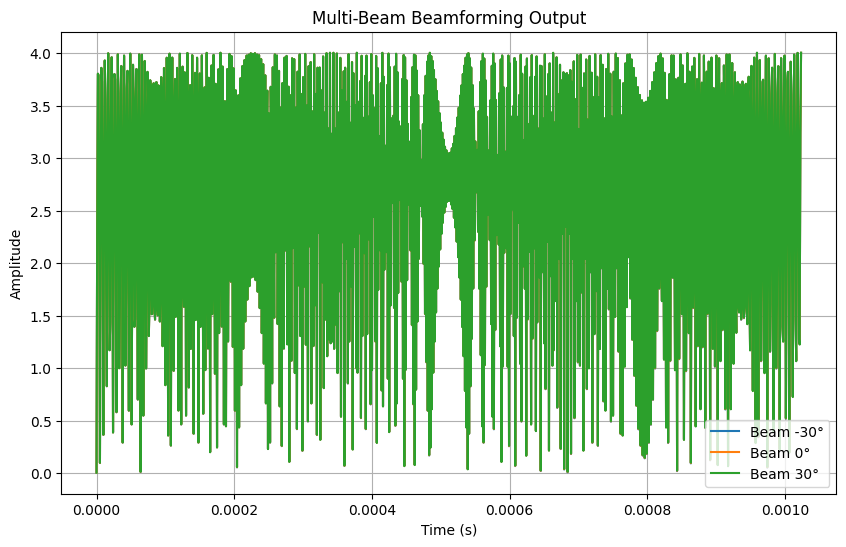

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N_antennas = 4            # Number of antennas in the array
N_samples = 1024           # Number of time samples
Fs = 1e6                   # Sampling frequency (1 MHz)
c = 3e8                    # Speed of light
d = 0.15                   # Antenna spacing (meters)
thetas = [-30, 0, 30]      # Beam directions in degrees
N_beams = len(thetas)

# Generate wideband signal (Linear chirp)
t = np.arange(N_samples) / Fs
f_start = 100e3            # Start frequency (100 kHz)
f_end = 400e3              # End frequency (400 kHz)
chirp_signal = np.sin(2 * np.pi * (f_start*t + 0.5*(f_end-f_start)*t**2/t[-1]))

# Simulate received signals with true time delays
theta_source = 10          # Actual signal direction (degrees)
received_signals = np.zeros((N_antennas, N_samples), dtype=np.complex_)

# Frequency-domain delay application
X = np.fft.fft(chirp_signal)
freqs = np.fft.fftfreq(N_samples, 1/Fs)

for m in range(N_antennas):
    delay = m*d*np.sin(np.deg2rad(theta_source))/c
    phase_shift = np.exp(-1j*2*np.pi*freqs*delay)
    received_signals[m] = np.fft.ifft(X * phase_shift)

# Beamforming processing
X_fft = np.fft.fft(received_signals, axis=1)
beam_outputs_freq = np.zeros((N_beams, N_samples), dtype=np.complex_)

for k in range(N_samples):
    f = freqs[k]
    if f == 0: continue  # Skip DC component
    
    # Create Vandermonde matrix for current frequency
    V = np.zeros((N_antennas, N_beams), dtype=np.complex_)
    for beam_idx, theta in enumerate(thetas):
        theta_rad = np.deg2rad(theta)
        phase_shifts = 2*np.pi*f*np.arange(N_antennas)*d*np.sin(theta_rad)/c
        V[:, beam_idx] = np.exp(-1j*phase_shifts)
    
    # Apply beamforming
    beam_outputs_freq[:, k] = (V.conj().T @ X_fft[:, k])

# Convert to time domain
beam_outputs = np.fft.ifft(beam_outputs_freq, axis=1)

# Plot results
plt.figure(figsize=(10, 6))
for i, theta in enumerate(thetas):
    plt.plot(t, np.abs(beam_outputs[i]), label=f'Beam {theta}°')
plt.title('Multi-Beam Beamforming Output')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

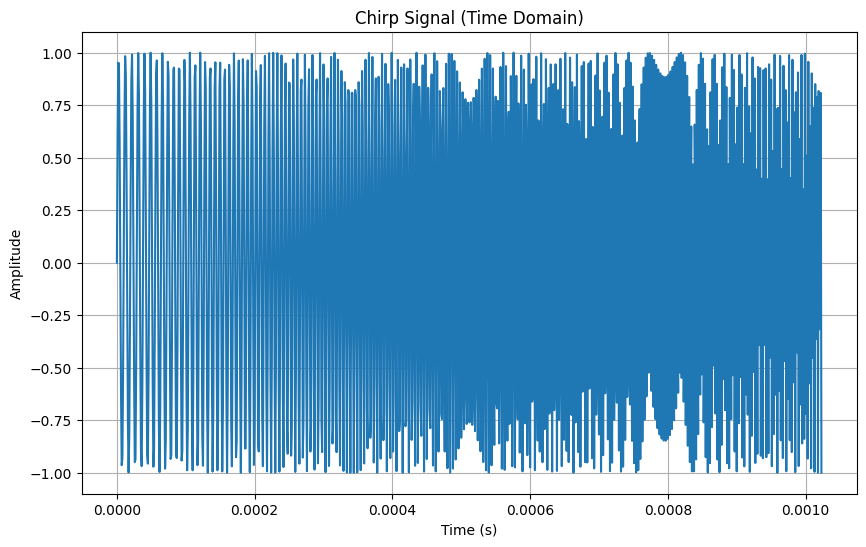

In [12]:
# Generate wideband signal (Linear chirp)
t = np.arange(N_samples) / Fs
chirp_signal = np.sin(2 * np.pi * (f_start*t + 0.5*(f_end-f_start)*t**2/t[-1]))

# Plot the chirp signal
plt.figure(figsize=(10, 6))
plt.plot(t, chirp_signal)
plt.title('Chirp Signal (Time Domain)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

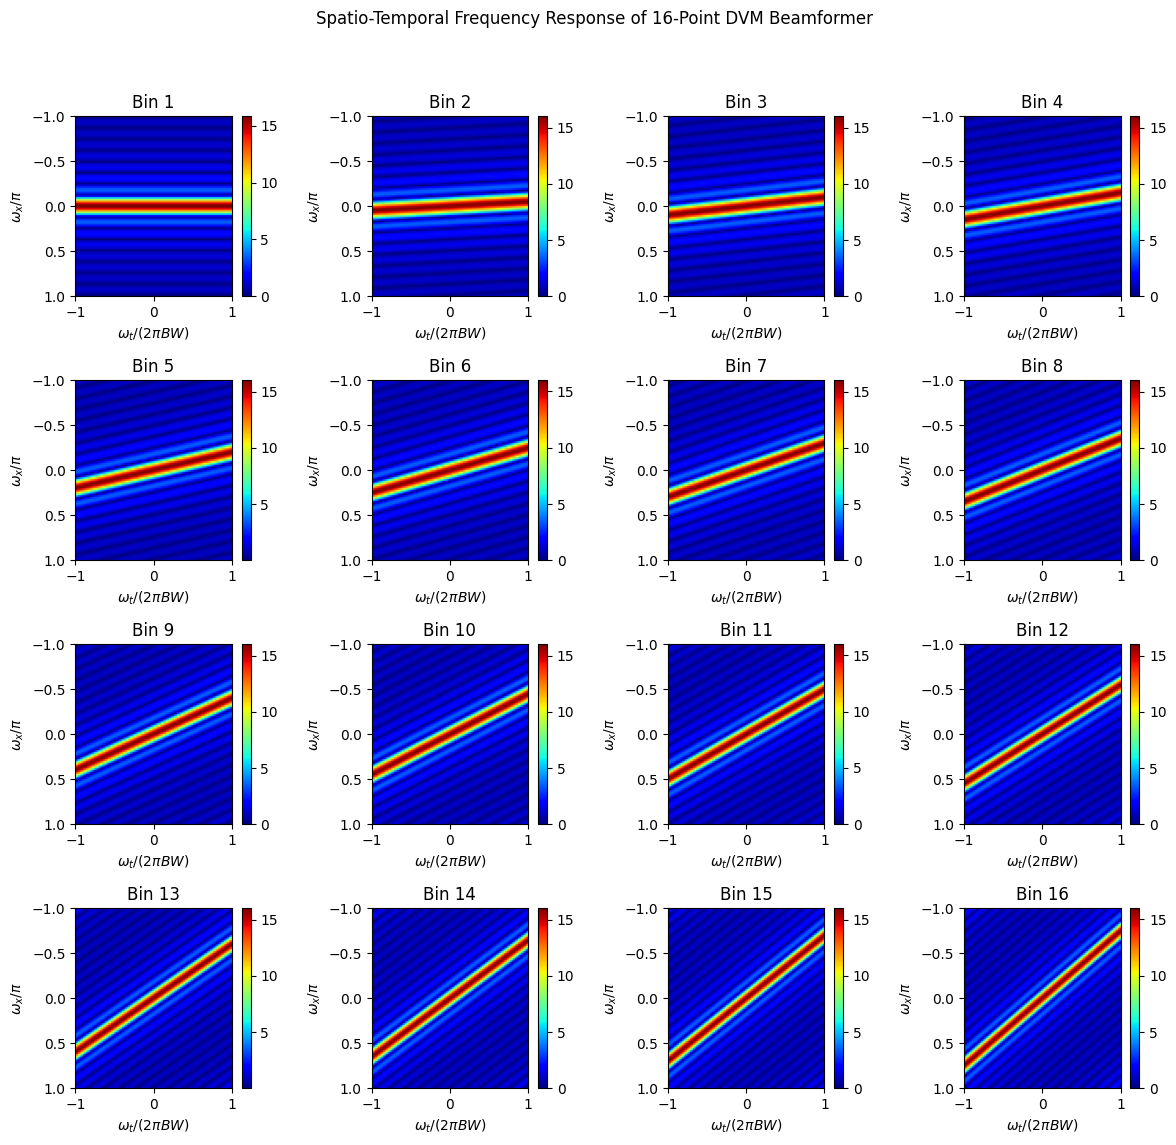

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 16  # Number of elements (16-point DVM)
c = 3e8  # Speed of light (m/s)
fc = 2e9  # Center frequency (2 GHz)
BW = 1e9  # Bandwidth (1 GHz)
f_min = fc - BW / 2  # Lower frequency (1.5 GHz)
f_max = fc + BW / 2  # Upper frequency (2.5 GHz)
lambda_min = c / f_max  # Minimum wavelength
dx = lambda_min / 2  # Inter-element spacing

# Time delay per element
tau_unit = 2*dx / (c * N)

# Define spatio-temporal frequency axes
omega_x = np.linspace(-np.pi, np.pi, 100)  # Normalized spatial frequency
omega_t = np.linspace(-2 * np.pi * BW, 2 * np.pi * BW, 100)  # Normalized temporal frequency

# Beam steering angles (not used for titles now)
l_values = np.arange(0, N)  # Beam index

# Compute beamformer response for each beam direction
H_total = np.zeros((len(omega_x), len(omega_t), len(l_values)), dtype=complex)

for l in range(len(l_values)):
    tau_l = tau_unit * l_values[l]
    for k in range(N):
        H_total[:, :, l] += np.exp(-1j * k * (omega_x[:, None] + omega_t * tau_l))

# Visualization
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

for l in range(len(l_values)):
    ax = axes.flatten()[l]
    im = ax.imshow(np.abs(H_total[:, :, l]), aspect='auto', extent=[omega_t[0] / (2 * np.pi * BW), omega_t[-1] / (2 * np.pi * BW), omega_x[-1] / np.pi, omega_x[0] / np.pi], cmap='jet')
    ax.set_xlabel(r'$\omega_t / (2\pi BW)$')
    ax.set_ylabel(r'$\omega_x / \pi$')
    ax.set_title(f'Bin {l + 1}')
    fig.colorbar(im, ax=ax)

plt.suptitle('Spatio-Temporal Frequency Response of 16-Point DVM Beamformer')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


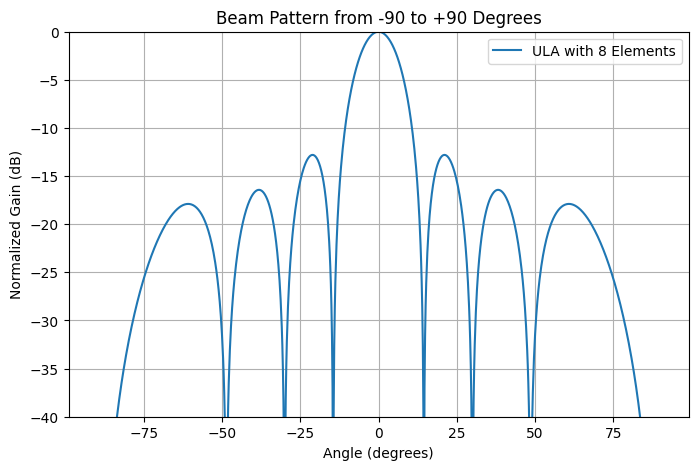

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
M = 8  # Number of antenna elements
d = 0.5  # Element spacing in terms of wavelength (λ/2)
theta = np.linspace(-90, 90, 1000)  # Angle range from -90 to 90 degrees
k = 2 * np.pi  # Wave number (assuming wavelength λ = 1)

# Compute Array Factor (AF)
AF = np.zeros_like(theta, dtype=complex)
for m in range(M):
    AF += np.exp(1j * k * d * m * np.sin(np.radians(theta)))  # Summing element contributions

# Normalize and convert to dB scale
AF_norm = np.abs(AF) / np.max(np.abs(AF))  # Normalize the magnitude
AF_dB = 20 * np.log10(AF_norm)  # Convert to dB

# Plot the beam pattern
plt.figure(figsize=(8, 5))
plt.plot(theta, AF_dB, label=f'ULA with {M} Elements')
plt.xlabel("Angle (degrees)")
plt.ylabel("Normalized Gain (dB)")
plt.title("Beam Pattern from -90 to +90 Degrees")
plt.grid()
plt.ylim(-40, 0)  # Limit y-axis to see beam clearly
plt.legend()
plt.show()


KeyError: 'top'

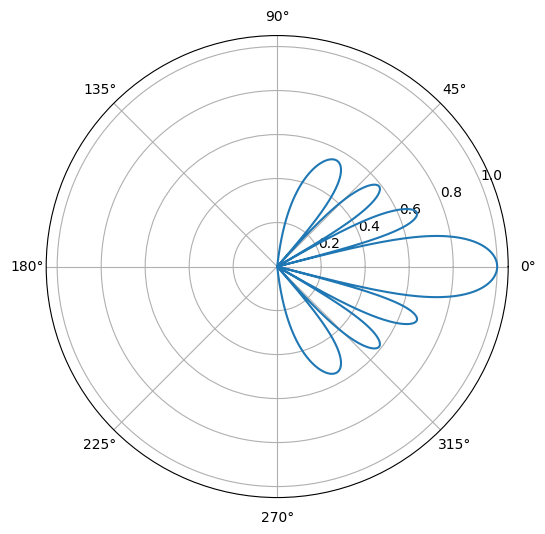

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
M = 8  # Number of antenna elements
d = 0.5  # Element spacing in terms of wavelength (λ/2)
theta = np.linspace(-90, 90, 1000)  # Angle range from -90° to 90°
k = 2 * np.pi  # Wave number (assuming wavelength λ = 1)
steering_angle = 0  # Beam steered to broadside (0 degrees)

# Convert theta to radians for polar plotting
theta_rad = np.radians(theta)

# Compute Array Factor (AF) for a single beam
AF = np.zeros_like(theta, dtype=complex)
for m in range(M):
    phase_shift = k * d * m * (np.sin(np.radians(theta)) - np.sin(np.radians(steering_angle)))
    AF += np.exp(1j * phase_shift)

# Normalize and convert to dB
AF_norm = np.abs(AF) / np.max(np.abs(AF))
AF_dB = 20 * np.log10(AF_norm)
AF_dB = np.maximum(AF_dB, -40)  # Limit dB range to avoid extreme values

# Plot in polar coordinates
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 6))
ax.plot(theta_rad, (AF_dB + 40) / 40, label=f'Steering {steering_angle}°')  # Normalize for better visibility

# Adjust plot aesthetics
ax.set_theta_zero_location("top")
ax.set_theta_direction(-1)  # Set angle direction (clockwise)
ax.set_xticks(np.radians([-90, -60, -30, 0, 30, 60, 90]))  # Label angles
ax.set_yticklabels([])  # Hide radius labels for a cleaner look
ax.grid(True)

# Show the plot
plt.show()
